# Entregável 1 - visão computacional

In [38]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.4.0 


# Equalização de histograma

In [39]:
rintin = cv2.imread("RinTinTin.jpg")

In [40]:
rintin.shape

(240L, 320L, 3L)

In [41]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [42]:
rintin_gray.shape
print(rintin_gray)

[[21 39 42 ..., 41 41 37]
 [22 40 44 ..., 42 42 37]
 [23 41 45 ..., 42 43 38]
 ..., 
 [14 28 35 ..., 18 18 17]
 [16 29 36 ..., 18 17 17]
 [18 31 38 ..., 18 17 17]]


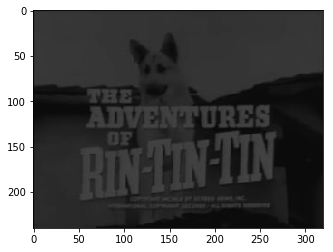

In [43]:
plt.imshow(rintin_gray,cmap="Greys_r", vmin=0, vmax=255)

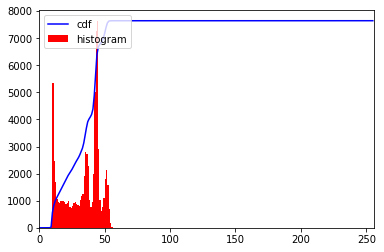

In [44]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

In [45]:
rintin_gray.min()
rintin_gray.max()

58

1 - Ele não aproveita bem as faixas de cores como é possível observar pelo histograma que esta concentrado na faixa de 8 a 58, e para que aproveitasse bem a faixa de cores deveria estar distribuido por todos os tons, de 0 a 256.


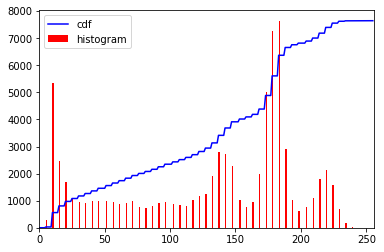

In [77]:
def f(pixel):
    return ((float(pixel) - 8)/50)*255
matriz = []
l =[]
for i in range(len(rintin_gray)):
    linha = rintin_gray[i]
    for p in linha:
        l.append(f(p))
    matriz.append(l)
    l = []

matriz = np.asarray(matriz)
hist,bins = np.histogram(matriz.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(matriz.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

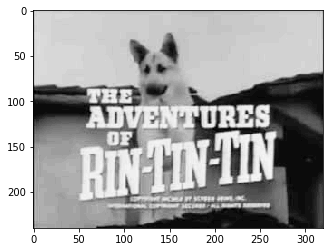

In [75]:
plt.imshow(matriz, vmin=0, vmax=255, cmap="Greys_r")

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


In [63]:
img = cv2.imread("hall_box_battery1.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_r = img_rgb[:,:,0]
img_b = img_rgb[:,:,2]

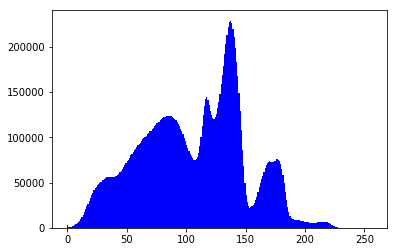

In [64]:
hist,bins = np.histogram(img_b.flatten(),256,[0,256])

plt.hist(img_b.flatten(),256,[0,256], color = 'b')
plt.show()

Como podemos observar pelo histograma, a bateria azul deve corresponder a faixa aproximadamente entre 150 e 180.

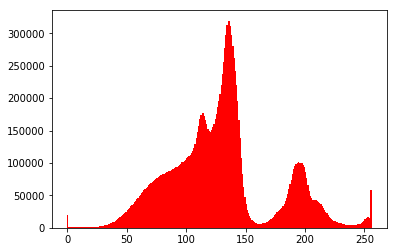

In [69]:
plt.hist(img_r.flatten(),256,[0,256], color = 'r')
plt.show()

Como podemos observar pelo histograma, a caixa vermelha deve corresponder a faixa entre 160 e 220.

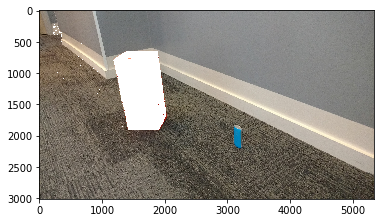

In [72]:
def cor(pixel):
    if pixel[0] > 161 and pixel[1] < 150 and pixel[2] < 150:
        return [255, 255, 255]
    else:
        return [pixel[0], pixel[1], pixel[2]]

matriz = []
l = []
for i in range(len(img_rgb)):
    linha = img_rgb[i]
    for p in linha:
        l.append(cor(p))
    matriz.append(l)
    l = []

matriz = np.asarray(matriz)
matriz = matriz.astype(np.uint8)
plt.imshow(matriz)